# EDA

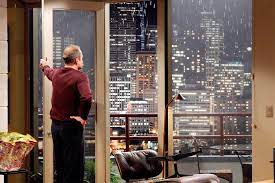

In [79]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Import dataframe 

In [80]:
# importing raw data
df = pd.read_csv("eda.csv", sep=",")
df

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593,263000018,3.000,2.500,1530.000,1131.000,3.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,21594,6600060120,4.000,2.500,2310.000,5813.000,2.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,21595,1523300141,2.000,0.750,1020.000,1350.000,2.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,21596,291310100,3.000,2.500,1600.000,2388.000,2.000,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000


### I. Overview and data cleaning 

Getting an overview of the data 

In [81]:
# df.info(): row indinces from 0 to N-1, list of every column name and the type of data in them
df.info()

# df.head(): prints the first five rows of the dataframe 
df.head()

# df.tail(): prints the last five rows of the dataframe 
df.tail()

# df.describe: prints out a summary of the numeric values- count, mean, std, min, 25%, 50%, 75%, max
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


Dealing with duplicates

In [82]:
# check for duplicates 
df.duplicated().value_counts()
df.columns.duplicated()

# there are no duplicated column names but house_id, id, and id.1 contain the same information
# drop column id.1 and id 

df.drop(["id.1"], axis="columns", inplace=True)
df.drop(["id"], axis="columns", inplace=True)
df

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000


Checking for data types and changing formats (when necessary)

In [83]:
# check data types
df.dtypes

date              object
price            float64
house_id           int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [84]:
# Date is an object
# check type of first date entry 
type(df["date"] [0])

# change date type to datetime with format %Y/%m/%d
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

type(df["date"] [0])

pandas._libs.tslibs.timestamps.Timestamp

Checking for missing values

<Axes: >

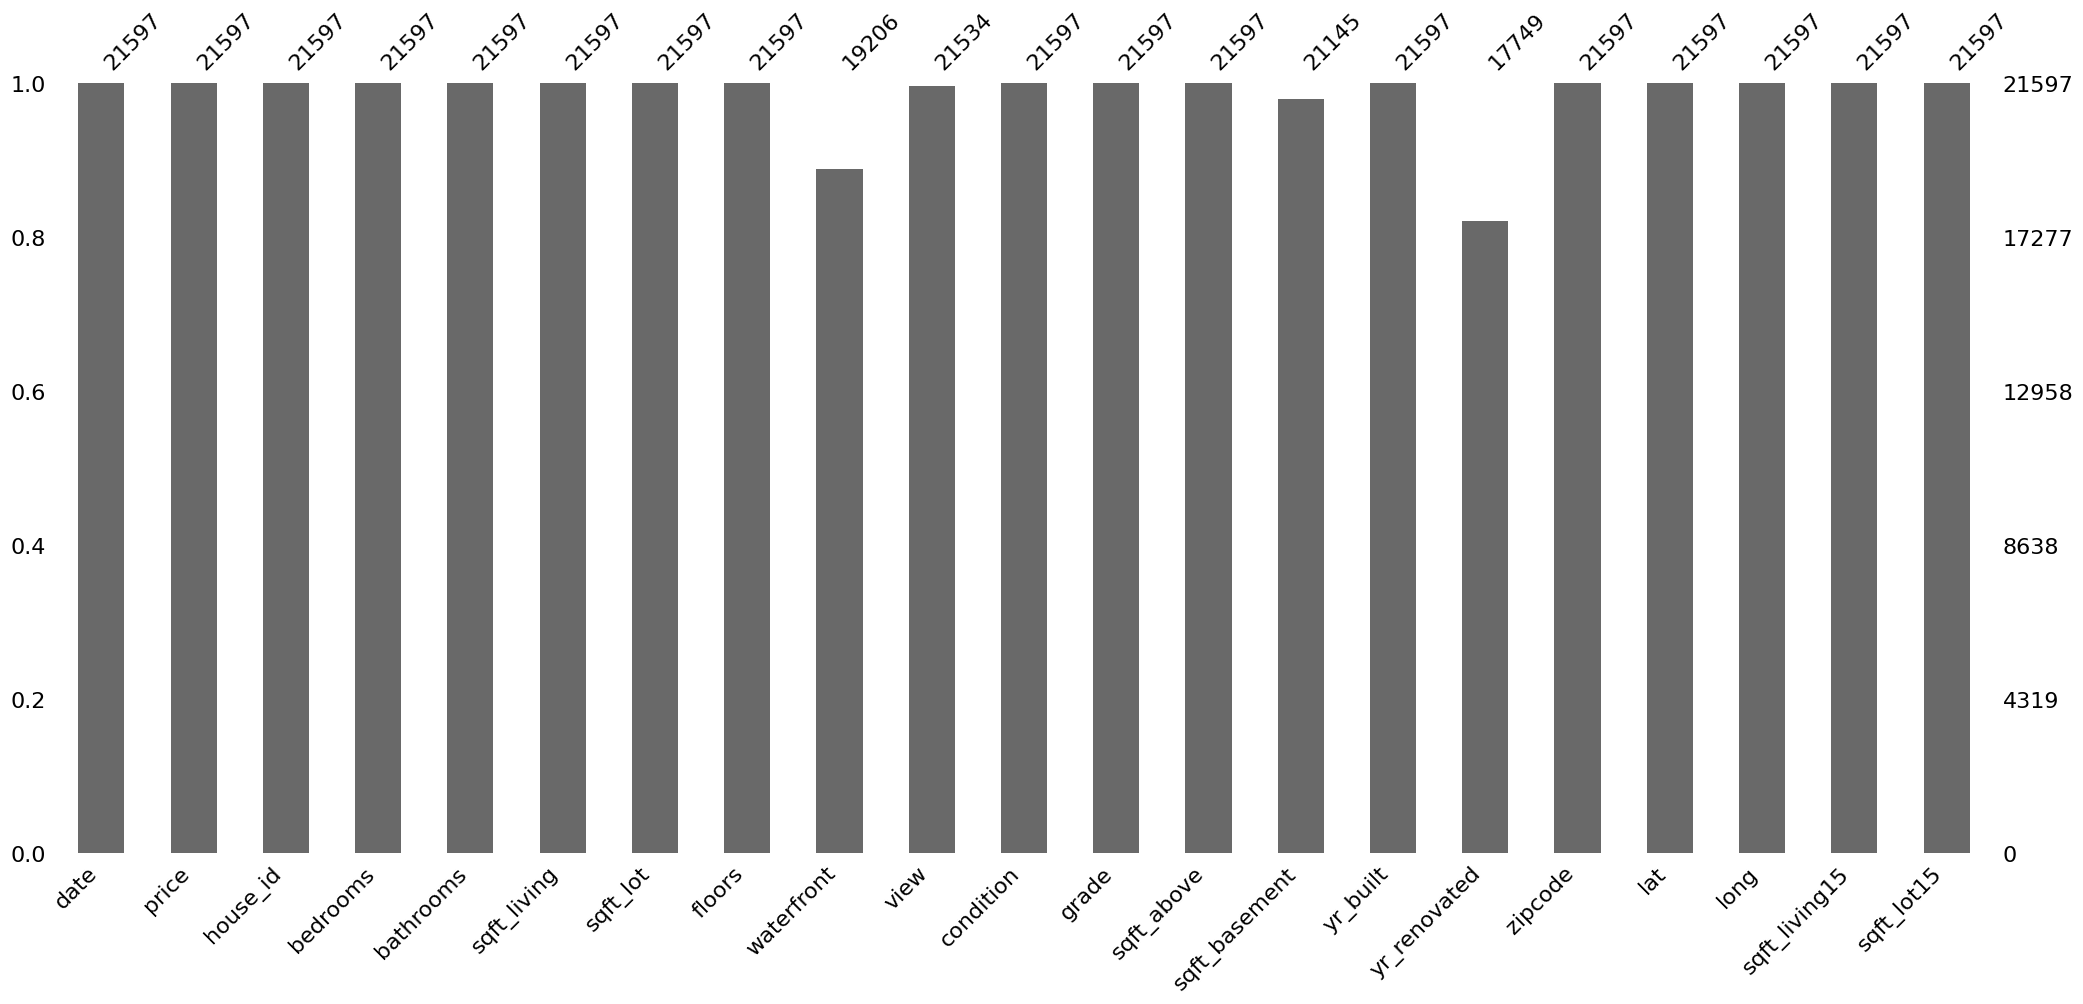

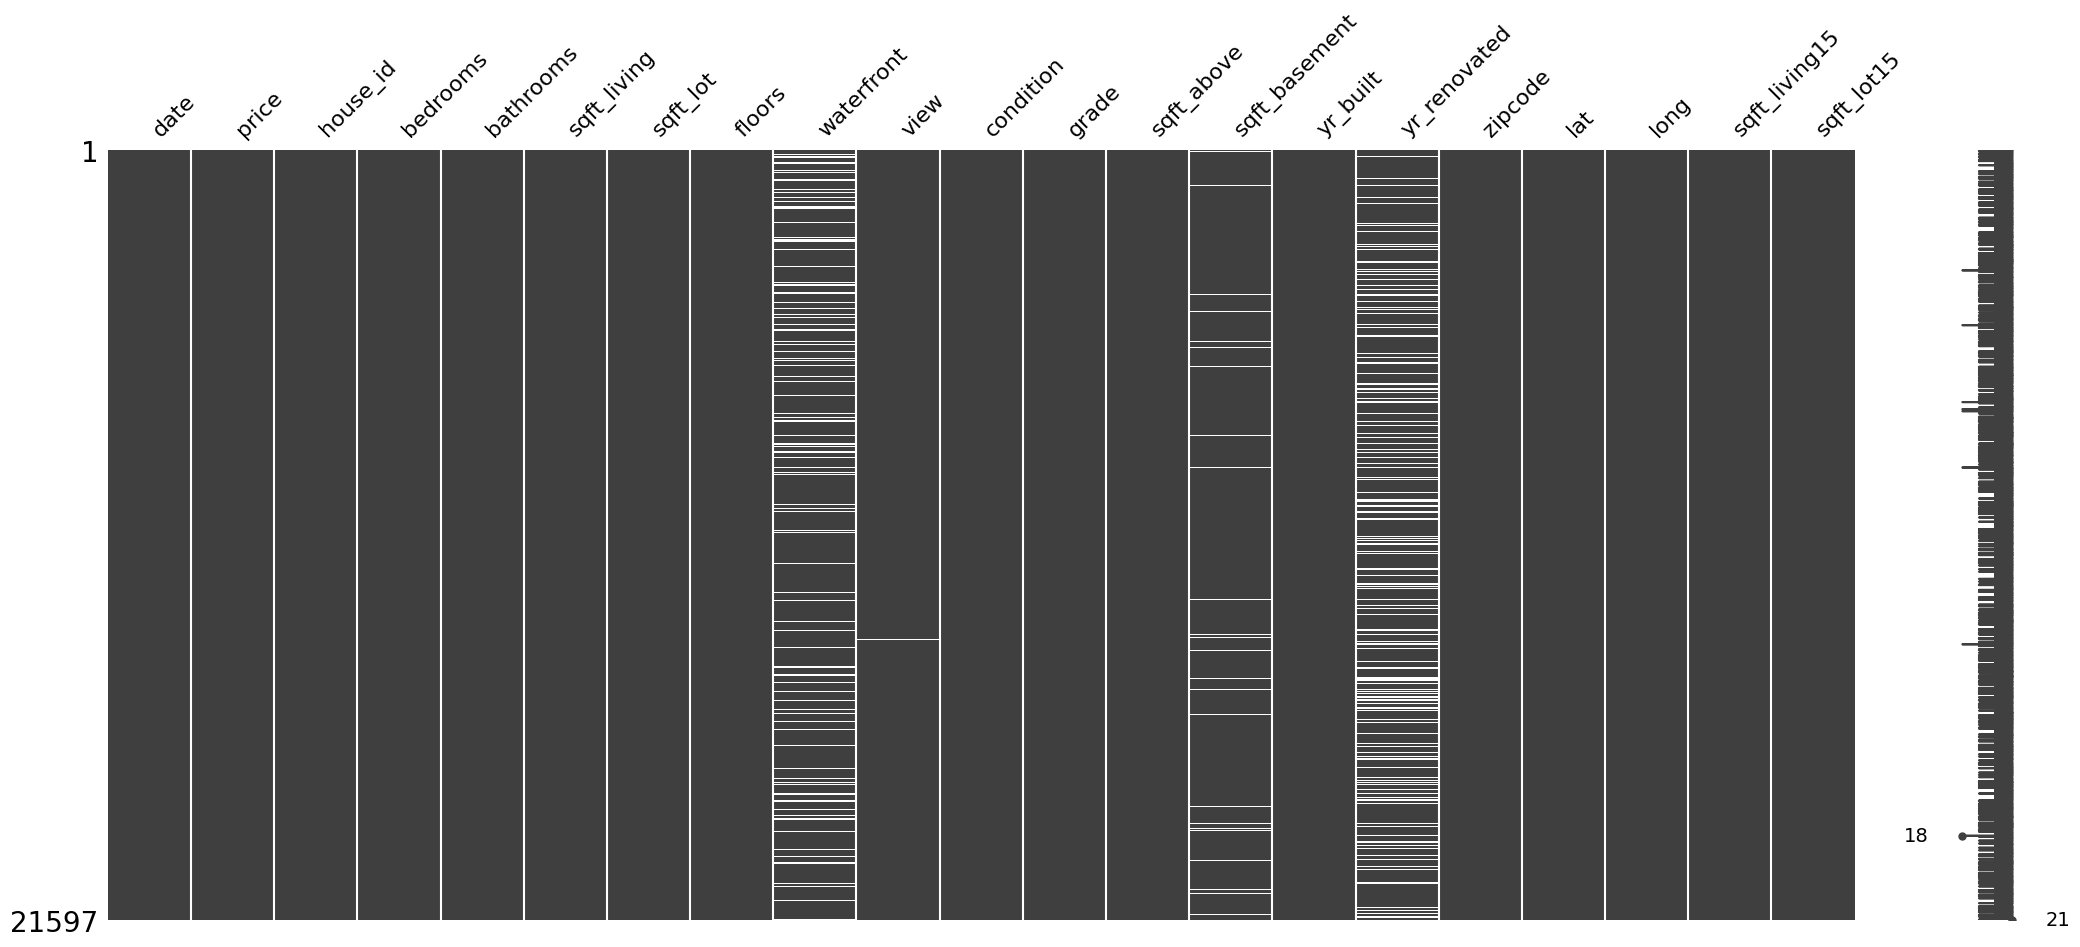

In [85]:
import missingno as msno
df.isna().sum()

# plotting percentage of missing values per column
msno.bar(df)

# matrix plot to see if data is missing in each column
msno.matrix(df)

# in this dataset the missing values would represent houses that do not have waterfront, 
# a view or havent been renovated or do not have a basement 

Checking for Nans

In [86]:
# checking for Nan 
df.isna().sum().sort_values(ascending=False)

yr_renovated     3848
waterfront       2391
sqft_basement     452
view               63
date                0
sqft_above          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
condition           0
grade               0
price               0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
house_id            0
sqft_lot15          0
dtype: int64

Correcting the column yr-renovated

In [87]:
# 1. check unique values and replace Nan with 0- assuming that Nan are houses that have not been renovated
df["yr_renovated"].value_counts(dropna=False)
df["yr_renovated"].nunique(dropna=True)
df["yr_renovated"].fillna(0, inplace=True)

In [88]:
# RUN ONCE 
# 2. correct the year 
#df["yr_renovated"] = df["yr_renovated"].fillna(0)
#df["yr_renovated"] = df["yr_renovated"] / 10
#df["yr_renovated"] = df["yr_renovated"].astype(int)
df.head()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,...,7,1180.000,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,...,7,2170.000,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,...,6,770.000,0.000,1933,0,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,...,7,1050.000,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,...,8,1680.000,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000


Correcting the column waterfront 

In [89]:
# 1. check unique values 
df["waterfront"].value_counts(dropna=False)
df["waterfront"].nunique(dropna=True)
df["waterfront"].dropna().unique()

# binary column: I will treat Nan as if they do not have waterfront 
# 1= property has waterfront, 0 = property has not waterfront, Nan = unknown or unrecorded (because the majority of the 
# properties do not have waterfront I will assume Nan as = 0)
# Replace NaNs with 0 and convert to integer
df["waterfront"] = df["waterfront"].fillna(0).astype(int)

# checking the replacement 
df["waterfront"].value_counts()

waterfront
0    21451
1      146
Name: count, dtype: int64

Correcting the column sqft_basement

In [90]:
# check unique values and replace Nan with 0
# I will treat Nan as if they do not have waterfront 
df["sqft_basement"].value_counts(dropna=False)
df["sqft_basement"].nunique(dropna=True)
df["sqft_basement"].dropna().unique()
df["sqft_basement"].value_counts()

sqft_basement
0.000       12827
600.000       217
700.000       209
500.000       209
800.000       201
            ...  
1920.000        1
3480.000        1
2730.000        1
2720.000        1
248.000         1
Name: count, Length: 303, dtype: int64

Correcting the column view 

In [91]:
# correct column view
df["view"].value_counts(dropna=False)

# this column seems to show the quality of the view: from 0 to 4- being 0 no view and 4 the best view 
df["view"].value_counts(dropna=False).sort_index()

# with view imputting does not seem right, and considering that it is only 63 values I will drop them
#df = df.dropna(subset=["view"])
df
df.dtypes

date             datetime64[ns]
price                   float64
house_id                  int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

Checking columns and data again

In [92]:
df.head()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,0,0.000,...,7,1180.000,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0,0.000,...,7,2170.000,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0,0.000,...,6,770.000,0.000,1933,0,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0,0.000,...,7,1050.000,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0,0.000,...,8,1680.000,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000


### II. Basic descriptive statistics & distributions 

Basic descriptive statistics 

In [93]:
# Overall summary 
print("General Statistics:\n")
display(df.describe().T)

# Count of unique values for key categorical/ binary columns 
print("\n Unique vakue counts:\n")
print("Waterfront:")
print(df["waterfront"].value_counts(dropna=False))

print("\nView:")
print(df["view"].value_counts(dropna=False))

print("\nCondition:")
print(df["condition"].value_counts(dropna=False))

General Statistics:



,count,mean,min,25%,50%,75%,max,std
date,21597,2014-10-29 04:20:38.171968512,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21597.000,540296.574,78000.000,322000.000,450000.000,645000.000,7700000.000,367368.140
house_id,21597.000,4580474287.771,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000,2876735715.748
bedrooms,21597.000,3.373,1.000,3.000,3.000,4.000,33.000,0.926
bathrooms,21597.000,2.116,0.500,1.750,2.250,2.500,8.000,0.769
sqft_living,21597.000,2080.322,370.000,1430.000,1910.000,2550.000,13540.000,918.106
sqft_lot,21597.000,15099.409,520.000,5040.000,7618.000,10685.000,1651359.000,41412.637
floors,21597.000,1.494,1.000,1.000,1.500,2.000,3.500,0.540
waterfront,21597.000,0.007,0.000,0.000,0.000,0.000,1.000,0.082
view,21534.000,0.234,0.000,0.000,0.000,0.000,4.000,0.766



 Unique vakue counts:

Waterfront:
waterfront
0    21451
1      146
Name: count, dtype: int64

View:
view
0.000    19422
2.000      957
3.000      508
1.000      330
4.000      317
NaN         63
Name: count, dtype: int64

Condition:
condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64


Distributions

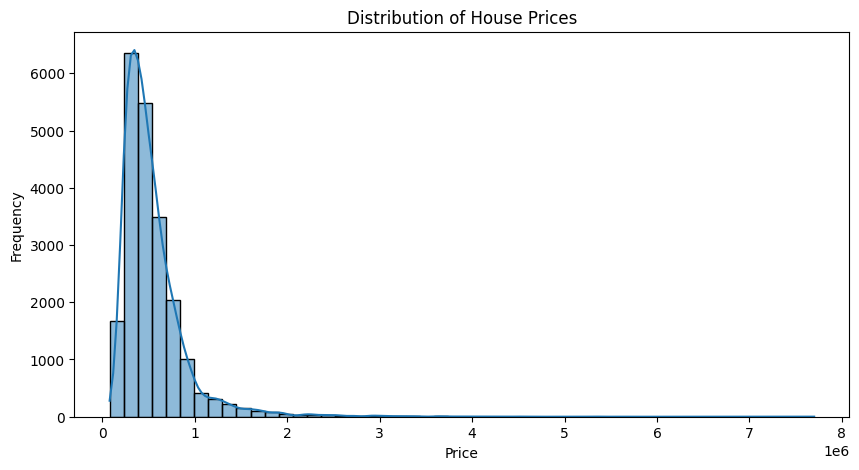

In [94]:
# 1. Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["price"], kde=True, bins=50)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

What happens when I filter prices and take out the price outliers? 
Remember: Larry has a budget and in this dataset there may a number of very expensive houses that he cannot afford
I will use the IQR rule (**Q1 - 1.5×IQR**, **Q3 + 1.5×IQR**)

In [97]:
def iqr_filter(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

if 'price' in df.columns and len(df) > 0:
    low, up = iqr_filter(df['price'])
    df_iqr = df[(df['price'] >= low) & (df['price'] <= up)].copy()
else:
    df_iqr = df.copy()

print("IQR-filtered shape:", df_iqr.shape)
df.head()

IQR-filtered shape: (20439, 21)


,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,0,0.000,...,7,1180.000,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0,0.000,...,7,2170.000,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0,0.000,...,6,770.000,0.000,1933,0,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0,0.000,...,7,1050.000,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0,0.000,...,8,1680.000,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000


In [100]:
df_iqr

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,0,0.000,...,7,1180.000,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0,0.000,...,7,2170.000,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0,0.000,...,6,770.000,0.000,1933,0,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0,0.000,...,7,1050.000,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0,0.000,...,8,1680.000,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,3.000,2.500,1530.000,1131.000,3.000,0,0.000,...,8,1530.000,0.000,2009,0,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,4.000,2.500,2310.000,5813.000,2.000,0,0.000,...,8,2310.000,0.000,2014,0,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,2.000,0.750,1020.000,1350.000,2.000,0,0.000,...,7,1020.000,0.000,2009,0,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,3.000,2.500,1600.000,2388.000,2.000,0,0.000,...,8,1600.000,0.000,2004,0,98027,47.535,-122.069,1410.000,1287.000


Map the price distribution

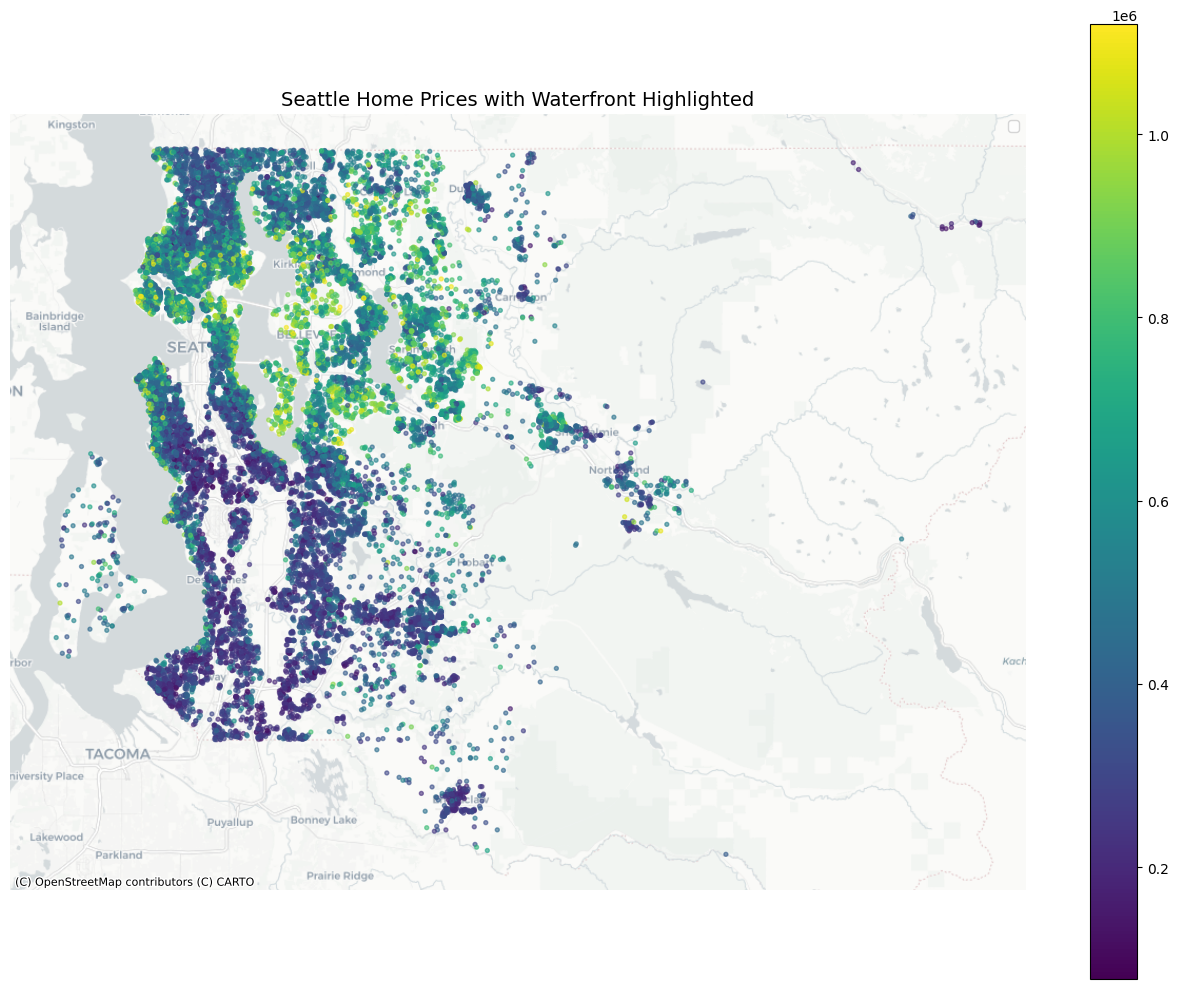

In [101]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# I will use the dataframe with the filtered prices
df_iqr = df_iqr.dropna(subset=['lat', 'long', 'price'])

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df_iqr, geometry=gpd.points_from_xy(df_iqr['long'], df_iqr['lat']), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)  # Web Mercator for basemap

# Plot
fig, ax = plt.subplots(figsize=(13, 10))

# Scatter all points by price (continuous color)
gdf.plot(ax=ax, column='price', cmap='viridis', markersize=8, alpha=0.6, legend=True)

# Overlay waterfront homes as outlined points
#gdf[gdf['waterfront'] == 1].plot(
    #ax=ax, marker='o', facecolor='none', edgecolor='orange', markersize=25,
    #linewidth=0.8, label='Waterfront (Outlined)'
#)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Final touches
ax.set_title("Seattle Home Prices with Waterfront Highlighted", fontsize=14)
ax.legend()
ax.set_axis_off()
plt.tight_layout()
plt.show()


Compare prices houses with waterfront vs houses without waterfron 

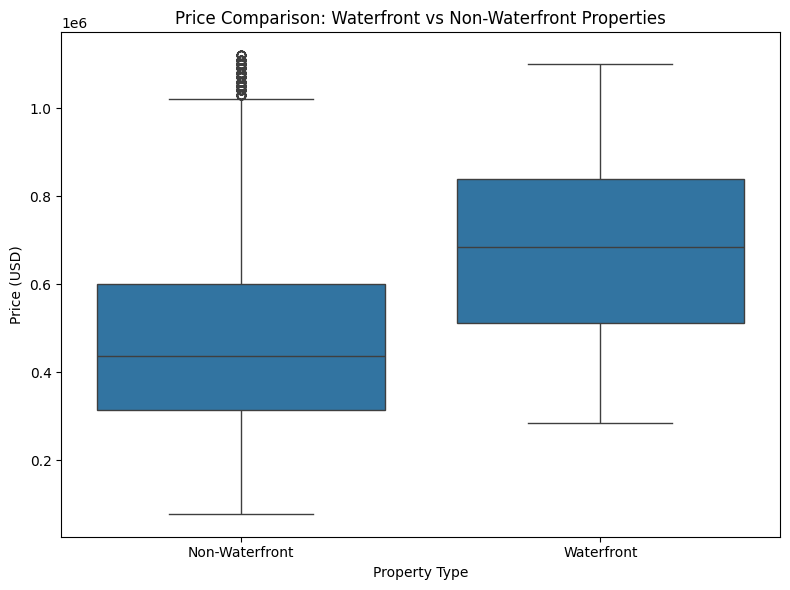

In [102]:
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df_iqr)

# Add labels and title
plt.xticks([0, 1], ['Non-Waterfront', 'Waterfront'])
plt.xlabel("Property Type")
plt.ylabel("Price (USD)")
plt.title("Price Comparison: Waterfront vs Non-Waterfront Properties")

# Show the plot
plt.tight_layout()
plt.show()

# Houses without WATERFRONT are in the range of 300.000- 600.000 and houses 
# with WATERFRONT are in the range of 500.000- 900.000

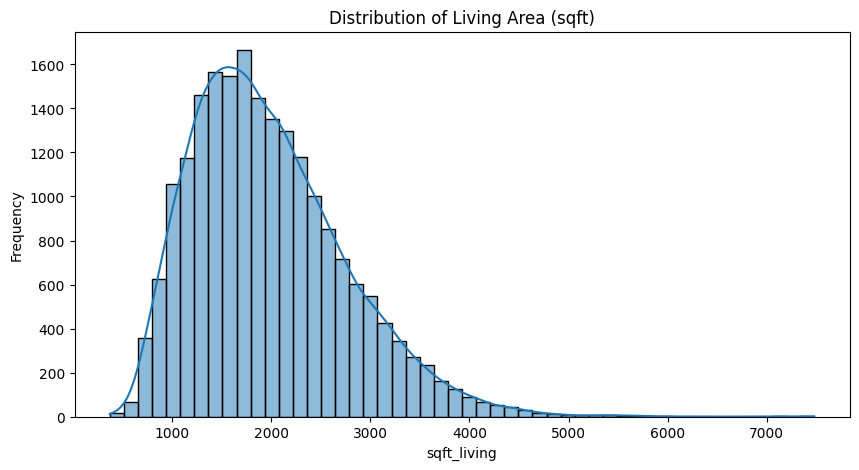

In [103]:
# 2. Living Area 
plt.figure(figsize=(10, 5))
sns.histplot(df_iqr["sqft_living"], kde=True, bins=50)
plt.title("Distribution of Living Area (sqft)")
plt.xlabel("sqft_living")
plt.ylabel("Frequency")
plt.show()

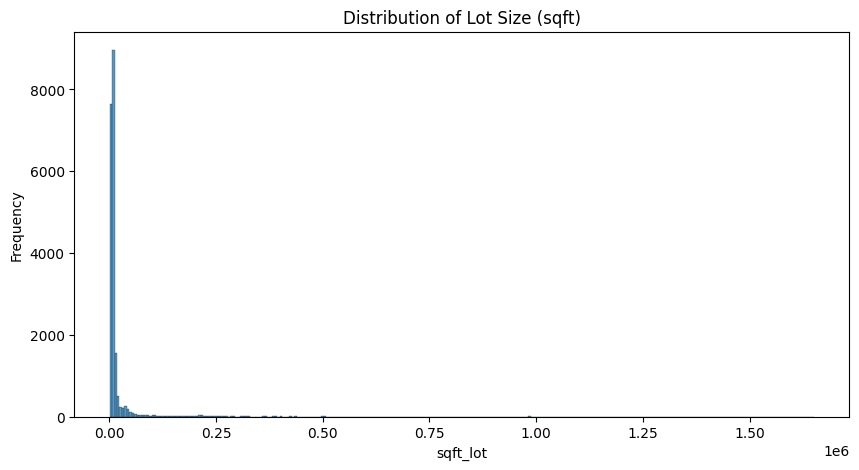

In [104]:
# 3. Lot size
plt.figure(figsize=(10, 5))
sns.histplot(df_iqr["sqft_lot"])
plt.title("Distribution of Lot Size (sqft)")
plt.xlabel("sqft_lot")
plt.ylabel("Frequency")
plt.show()

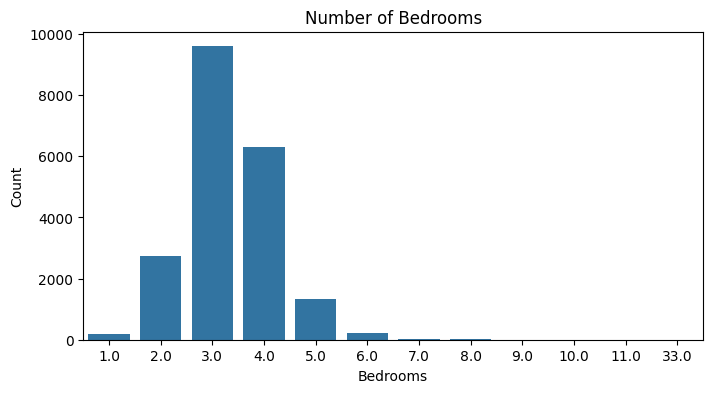

In [105]:
# 4. Number of Bedrooms 
plt.figure(figsize=(8, 4))
sns.countplot(x= "bedrooms", data=df_iqr)
plt.title("Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

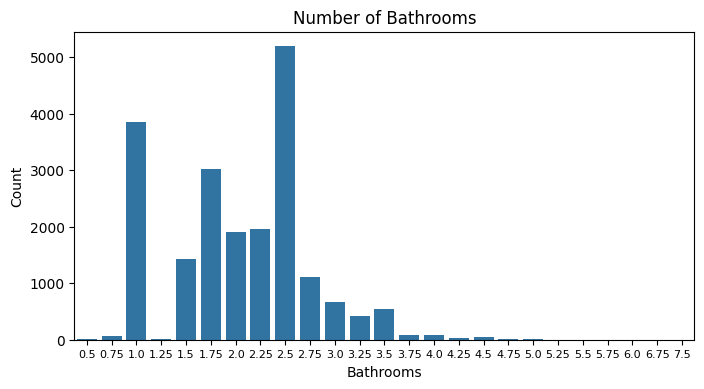

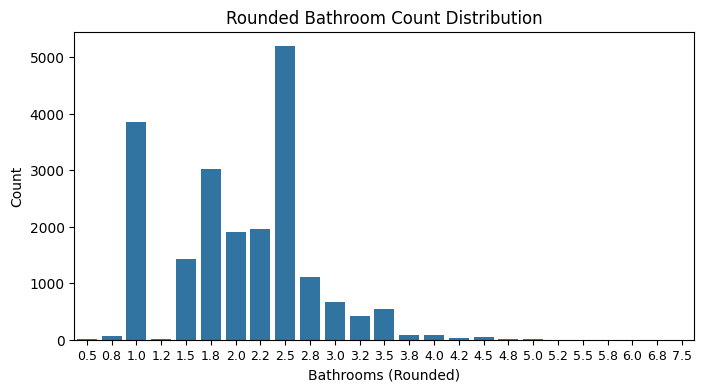

In [106]:
# 4. Number of Bathrooms 
plt.figure(figsize=(8, 4))
sns.countplot(x= "bathrooms", data=df_iqr)
plt.xticks(fontsize=8)
plt.title("Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.show()

#better version with rounded values 
df_iqr["bathrooms_rounded"] = df_iqr["bathrooms"].round(1)

plt.figure(figsize=(8, 4))
sns.countplot(x="bathrooms_rounded", data=df_iqr)
plt.title("Rounded Bathroom Count Distribution")
plt.xlabel("Bathrooms (Rounded)")
plt.ylabel("Count")
plt.xticks(fontsize=9)
plt.show()


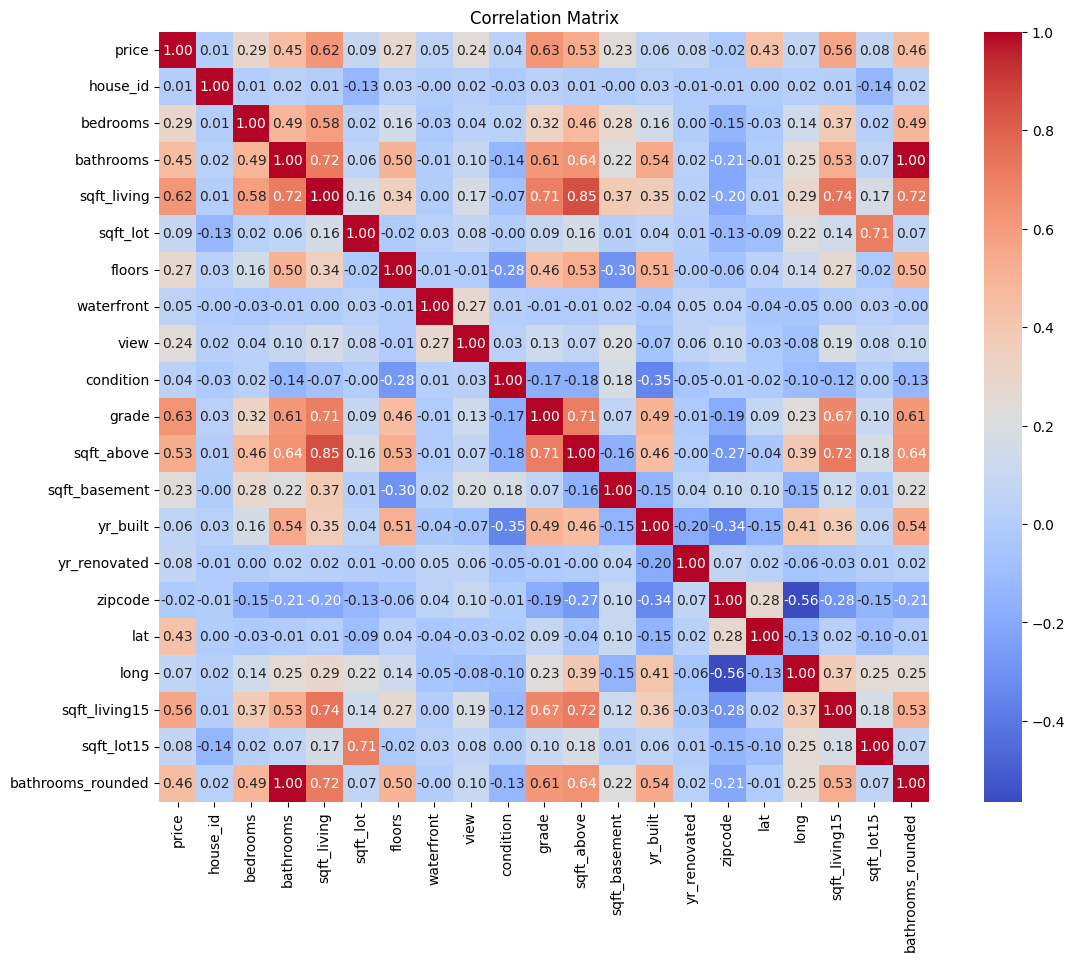

In [107]:
# 6. Correlation Heatmap 
plt.figure(figsize=(14, 10))
correlation_matrix = df_iqr.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

I will cluster locations to define central and having a consistent way of separation central vs other regions 

In [108]:

from sklearn.cluster import KMeans

if {'lat','long'}.issubset(df_iqr.columns) and df_iqr[['lat','long']].dropna().shape[0] > 0:
    coords = df_iqr[['lat','long']].dropna()
    k = 5  # adjust if you want more/less granular regions
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    df_iqr = df_iqr.loc[coords.index].copy()
    df_iqr['cluster'] = kmeans.fit_predict(coords)

    # Compute centroids to help with labeling
    centroids = df_iqr.groupby('cluster')[['lat','long']].mean().reset_index()
    display(centroids)

    # ==== MANUAL LABELS (edit after inspecting `centroids`) ====
    # Tip: Downtown Seattle ~ (47.61, -122.33)
    cluster_labels = {
        0: 'Central',
        1: 'North',
        2: 'South',
        3: 'East',
        4: 'West'
    }
    df_iqr['region'] = df_iqr['cluster'].map(cluster_labels)
else:
    print("lat/long missing or empty; skipping clustering.")

,cluster,lat,long
0,0,47.618,-122.027
1,1,47.700,-122.303
2,2,47.535,-122.308
3,3,47.394,-122.114
4,4,47.332,-122.304


### III. Hypothesis testing 

HYPOTHESIS 1: Waterfront properties tend to be more expensive, but there may be still some less pricey options in less densely populated neighborhoods 

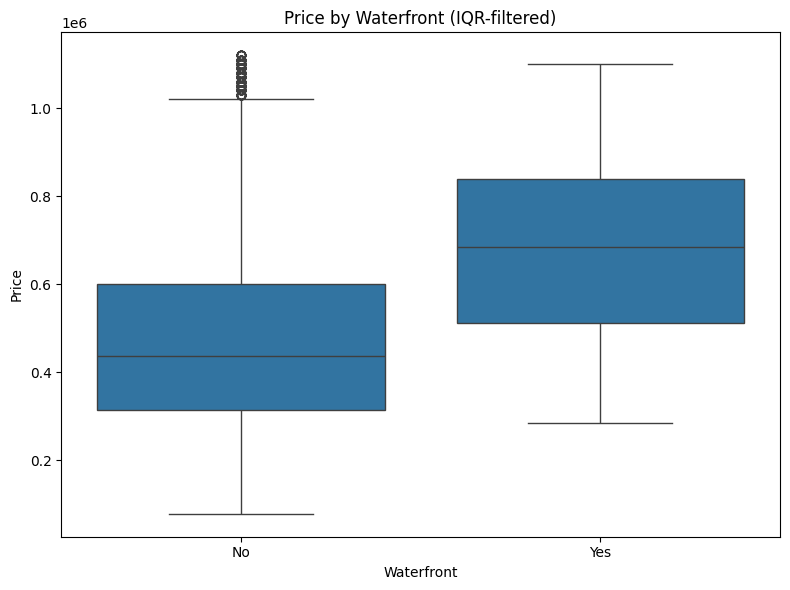

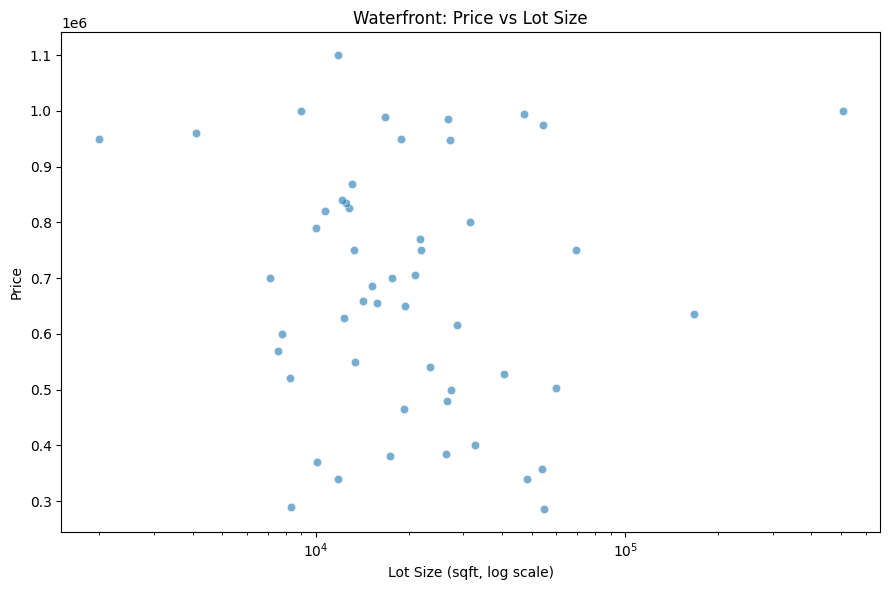

Affordable+Isolated waterfront homes: 14


,price,sqft_lot,bedrooms,bathrooms,zipcode,lat,long
1947,480000.000,26487.000,2.000,1.500,98070,47.385,-122.479
6096,340000.000,48292.000,2.000,0.750,98070,47.428,-122.511
8149,503000.000,59612.000,2.000,1.750,98023,47.328,-122.389
8270,400000.000,32718.000,3.000,2.500,98070,47.334,-122.511
9076,650000.000,19386.000,3.000,1.750,98198,47.355,-122.324
11544,357000.000,53882.000,3.000,2.000,98198,47.381,-122.325
13512,500000.000,27332.000,2.000,1.000,98198,47.380,-122.325
13564,635000.000,167125.000,3.000,1.750,98070,47.459,-122.504
14813,465000.000,19271.000,2.000,2.000,98070,47.473,-122.497
17460,540000.000,23361.000,3.000,2.500,98146,47.500,-122.379


In [126]:
if 'waterfront' in df_iqr.columns and 'price' in df_iqr.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df_iqr, x='waterfront', y='price')
    plt.xticks([0,1], ['No','Yes'])
    plt.title('Price by Waterfront (IQR-filtered)')
    plt.xlabel('Waterfront')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

    # Waterfront-only scatter: price vs lot size
    if {'sqft_lot'}.issubset(df_iqr.columns):
        w = df_iqr[df_iqr['waterfront'] == 1].copy()
        if len(w) > 0:
            plt.figure(figsize=(9,6))
            sns.scatterplot(data=w, x='sqft_lot', y='price', alpha=0.6)
            plt.xscale('log')  # lot sizes are often skewed
            plt.title('Waterfront: Price vs Lot Size')
            plt.xlabel('Lot Size (sqft, log scale)')
            plt.ylabel('Price')
            plt.tight_layout()
            plt.show()

            # Flag affordable & isolated waterfront options
            med_price_w = w['price'].median()
            med_lot_w = w['sqft_lot'].median()
            w['affordable_isolated'] = (w['price'] <= med_price_w) & (w['sqft_lot'] >= med_lot_w)
            print("Affordable+Isolated waterfront homes:", w['affordable_isolated'].sum())
            display(w.loc[w['affordable_isolated'], ['price','sqft_lot','bedrooms','bathrooms','zipcode','lat','long']].head(10))
        else:
            print("No waterfront=1 rows after filtering.")
else:
    print("Required columns missing for H1.")

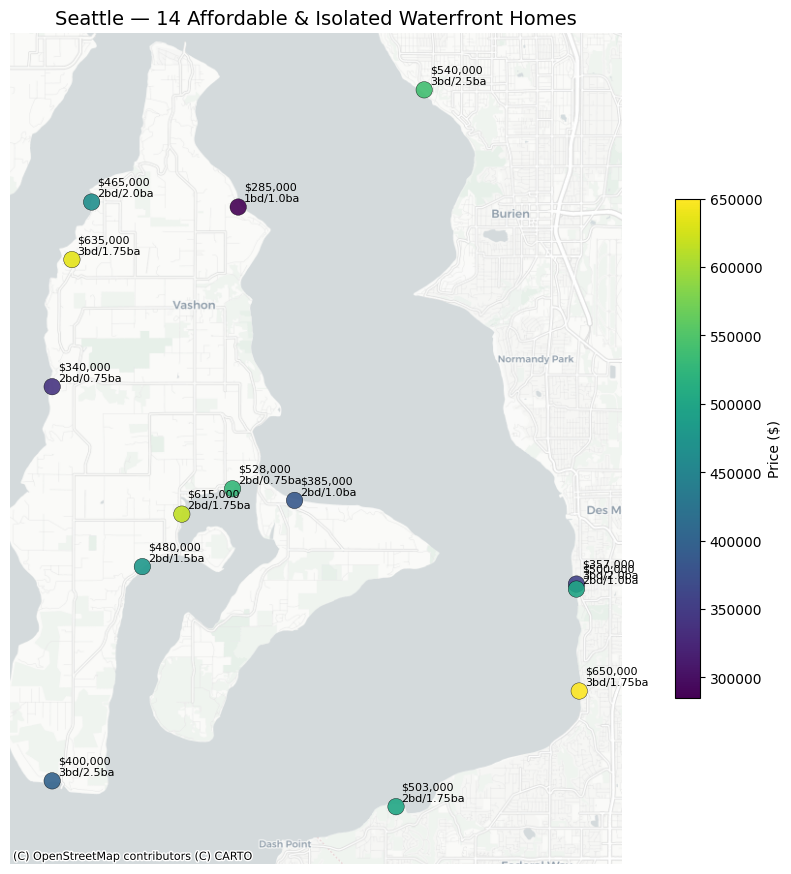

In [127]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

# Take your 14 homes
sel = w[w['affordable_isolated']].copy()

# Build GeoDataFrame & project to Web Mercator for basemap tiles
gdf = gpd.GeoDataFrame(
    sel,
    geometry=gpd.points_from_xy(sel['long'], sel['lat']),
    crs="EPSG:4326"
).to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(11, 9))

# Plot points sized by lot, colored by price
gdf.plot(
    ax=ax,
    column='price',
    cmap='viridis',
    markersize=np.clip(gdf['sqft_lot'] / 50, 10, 140),
    alpha=0.9,
    edgecolor='black',
    linewidth=0.3,
    legend=True,
    legend_kwds={"label": "Price ($)", "shrink": 0.6}
)

# Keep map focused on your data
minx, miny, maxx, maxy = gdf.total_bounds
padx, pady = (maxx - minx) * 0.08, (maxy - miny) * 0.08
ax.set_xlim(minx - padx, maxx + padx)
ax.set_ylim(miny - pady, maxy + pady)

# Basemap (provider name varies by version; try xyz first, else URL fallback)
try:
    from xyzservices import providers as xyz
    ctx.add_basemap(ax, source=xyz.CartoDB.Positron, zoom=12)
except Exception:
    ctx.add_basemap(ax, source="https://cartodb-basemaps-a.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png", zoom=12)

# Optional annotations (price + beds/baths)
for x, y, p, bd, ba in zip(gdf.geometry.x, gdf.geometry.y, gdf['price'], gdf['bedrooms'], gdf['bathrooms']):
    ax.annotate(f"${int(p):,}\n{int(bd)}bd/{ba}ba", xy=(x, y), xytext=(4, 4),
                textcoords="offset points", fontsize=8)

ax.set_title("Seattle — 14 Affordable & Isolated Waterfront Homes", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
# Save for slides
plt.savefig("H1_14_Waterfront_AffIso_Seattle.png", dpi=300, bbox_inches="tight")
plt.show()


HYPOTEHSIS 2.  Properties located in central, but less densely populated neighborhoods are more likely to have fewer children

Central: % of homes with <3 bedrooms AND isolated: 3.0%


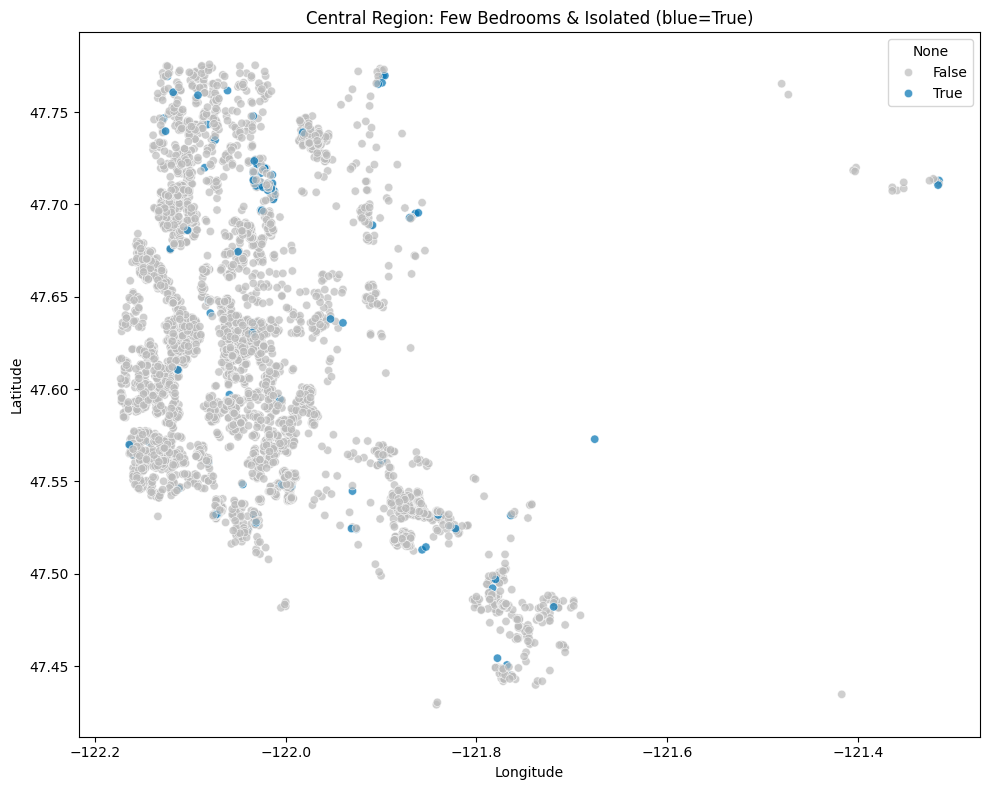

,avg_bedrooms,avg_sqft_lot,avg_sqft_lot15,pct_few_isolated
zipcode,,,,
98053,3.174,29743.127,25350.591,25.594
98014,2.967,90361.760,70917.215,19.835
98024,3.233,84140.658,71361.589,12.329
98027,3.430,14473.420,15719.997,10.239
98019,3.363,39838.384,37016.511,7.895
98045,3.229,48600.514,30567.037,7.798
98065,3.538,14157.469,9924.997,6.601
98029,3.403,6800.853,6702.086,6.070
98072,3.511,43742.847,33611.679,5.839


In [110]:
needed = {'bedrooms','sqft_lot','sqft_lot15','lat','long','region'}
if needed.issubset(df_iqr.columns):
    df_iqr['few_beds'] = df_iqr['bedrooms'] < 3
    df_iqr['is_isolated'] = df_iqr['sqft_lot'] > df_iqr['sqft_lot15']

    central = df_iqr[df_iqr['region'] == 'Central'].copy()
    if len(central) > 0:
        pct = (central['few_beds'] & central['is_isolated']).mean() * 100
        print(f"Central: % of homes with <3 bedrooms AND isolated: {pct:.1f}%")

        plt.figure(figsize=(10,8))
        sns.scatterplot(
            data=central, x='long', y='lat',
            hue=central['few_beds'] & central['is_isolated'],
            palette={True: '#0072B2', False: '#BBBBBB'},
            alpha=0.7
        )
        plt.title('Central Region: Few Bedrooms & Isolated (blue=True)')
        plt.xlabel('Longitude'); plt.ylabel('Latitude')
        plt.tight_layout(); plt.show()

        # Heatmap-like summary by zipcode (optional)
        if 'zipcode' in central.columns:
            agg = central.groupby('zipcode').agg(
                avg_bedrooms=('bedrooms','mean'),
                avg_sqft_lot=('sqft_lot','mean'),
                avg_sqft_lot15=('sqft_lot15','mean'),
                pct_few_isolated=('few_beds','mean')
            ).assign(pct_few_isolated=lambda d: (d['pct_few_isolated']*100))
            display(agg.sort_values('pct_few_isolated', ascending=False).head(10))
    else:
        print("No rows labeled region=='Central'. Adjust cluster label mapping in Step 3.")
else:
    print("Required columns missing for H2.")

HYPOTHESIS 3. Waterfront properties that have not been recently renovated may be more affordable, but still have a scenic view

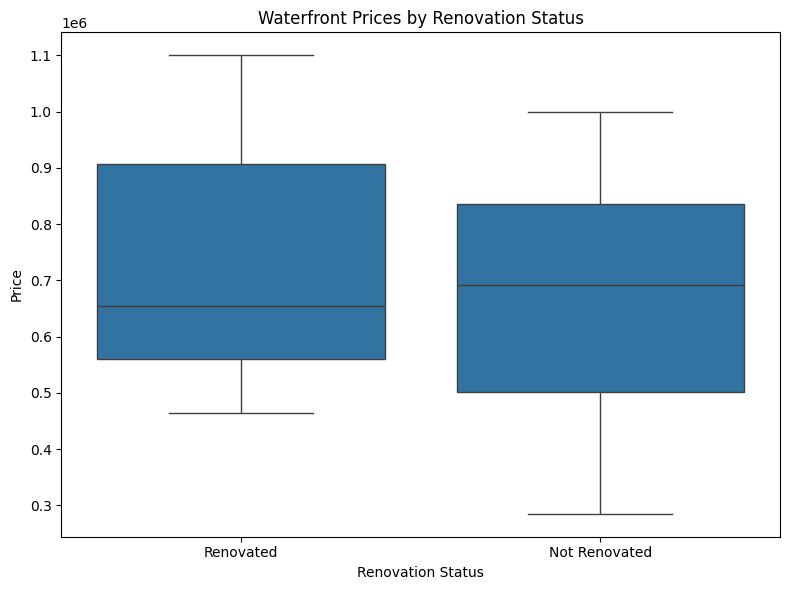

,count,median,mean
renovation_status,,,
Not Renovated,40,692500.000,665834.000
Renovated,11,655000.000,731818.000


If the medians/means are similar → renovation doesn’t strongly affect price for waterfront homes.


In [111]:
need_cols = {'waterfront','price','yr_renovated'}
if need_cols.issubset(df_iqr.columns):
    w = df_iqr[df_iqr['waterfront'] == 1].copy()
    if len(w) > 0:
        w['renovation_status'] = np.where((w['yr_renovated'].fillna(0) == 0), 'Not Renovated', 'Renovated')

        plt.figure(figsize=(8,6))
        sns.boxplot(data=w, x='renovation_status', y='price')
        plt.title('Waterfront Prices by Renovation Status')
        plt.xlabel('Renovation Status'); plt.ylabel('Price')
        plt.tight_layout(); plt.show()

        summary = w.groupby('renovation_status')['price'].agg(['count','median','mean']).round(0)
        display(summary)
        print("If the medians/means are similar → renovation doesn’t strongly affect price for waterfront homes.")
    else:
        print("No waterfront rows after filtering.")
else:
    print("Required columns missing for H3.")


#yr- renovated does not change the price 

Final list for Larry 

,price,sqft_lot,sqft_living,bedrooms,bathrooms,region,zipcode,lat,long
2962,999000.000,505166.000,2830.000,3.000,2.750,West,98070,47.378,-122.514
13564,635000.000,167125.000,1940.000,3.000,1.750,South,98070,47.459,-122.504
17138,750000.000,69351.000,2960.000,3.000,2.500,West,98070,47.400,-122.420


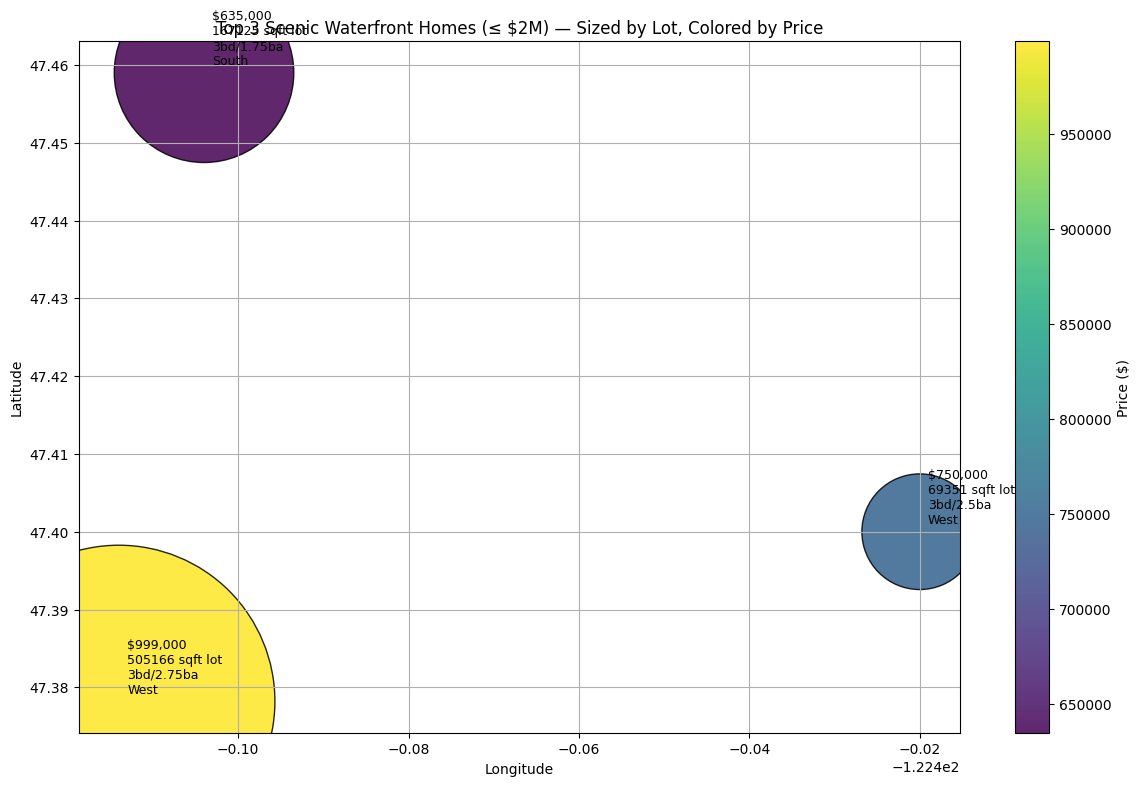

In [112]:

criteria_cols = {'waterfront','price','sqft_lot','lat','long'}
if criteria_cols.issubset(df_iqr.columns):
    shortlist = df_iqr[(df_iqr['waterfront'] == 1) & (df_iqr['price'] <= 2_000_000)].copy()
    shortlist = shortlist.sort_values(by='sqft_lot', ascending=False)

    top3 = shortlist.head(3).copy()
    display(top3[['price','sqft_lot','sqft_living','bedrooms','bathrooms','region','zipcode','lat','long']])

    # Map-like scatter with annotations
    if len(top3) > 0:
        plt.figure(figsize=(12,8))
        sc = plt.scatter(top3['long'], top3['lat'],
                         s=top3['sqft_lot']/10, c=top3['price'],
                         cmap='viridis', edgecolors='black', alpha=0.85)
        for _, r in top3.iterrows():
            plt.annotate(f"${int(r['price']):,}\n{int(r['sqft_lot'])} sqft lot\n{int(r['bedrooms'])}bd/{r['bathrooms']}ba\n{r.get('region','')}",
                         (r['long'], r['lat']), textcoords='offset points', xytext=(6,6), fontsize=9)
        plt.colorbar(sc, label='Price ($)')
        plt.title("Top 3 Scenic Waterfront Homes (≤ $2M) — Sized by Lot, Colored by Price")
        plt.xlabel("Longitude"); plt.ylabel("Latitude")
        plt.grid(True); plt.tight_layout(); plt.show()
else:
    print("Required columns missing for final shortlist.")

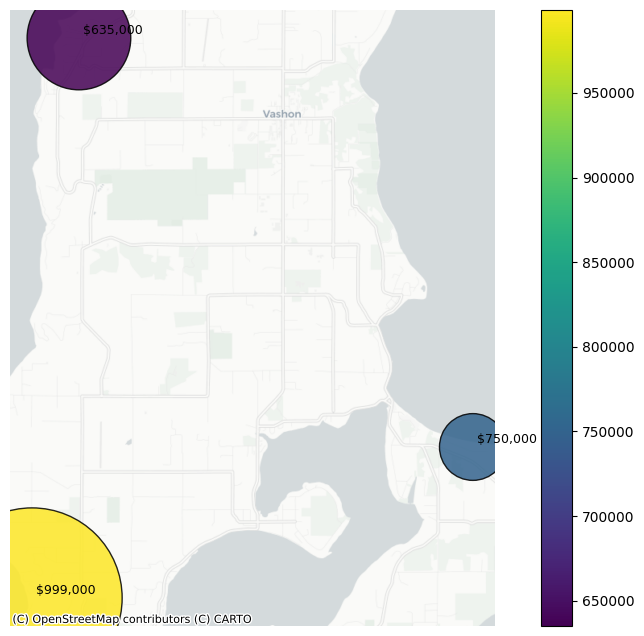

In [119]:
import geopandas as gpd
import contextily as ctx

criteria_cols = {'waterfront','price','sqft_lot','lat','long'}
if criteria_cols.issubset(df_iqr.columns):
    shortlist = df_iqr[(df_iqr['waterfront'] == 1) & (df_iqr['price'] <= 2_000_000)].copy()
    shortlist = shortlist.sort_values(by='sqft_lot', ascending=False)
    top3 = shortlist.head(3).copy()

    # Convert to GeoDataFrame
    gdf = gpd.GeoDataFrame(
        top3,
        geometry=gpd.points_from_xy(top3['long'], top3['lat']),
        crs="EPSG:4326"  # Lat/long
    ).to_crs(epsg=3857)  # Web Mercator for basemap

    # Plot points
    ax = gdf.plot(
        figsize=(12, 8),
        markersize=gdf['sqft_lot'] / 30,
        column='price',
        cmap='viridis',
        edgecolor='black',
        alpha=0.85,
        legend=True
    )

    # Annotate prices
    for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['price']):
        ax.annotate(
            f"${int(label):,}",
            xy=(x, y), xytext=(3, 3),
            textcoords="offset points", fontsize=9
        )
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    ax.set_axis_off()
else:
    print("Required columns missing for final shortlist.")



--------------------------------------------------------------------------------------------------------------------------------

Plots to add in the presentation

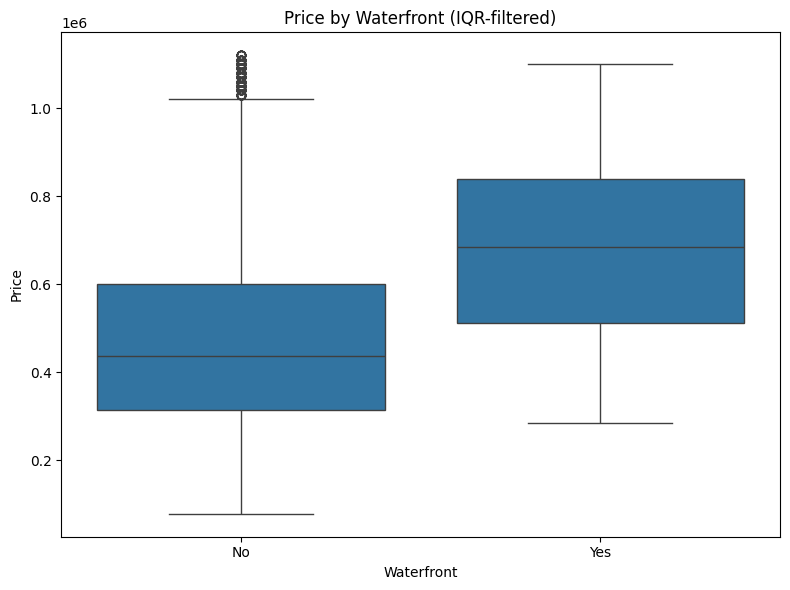

In [120]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_iqr, x='waterfront', y='price')
plt.xticks([0,1], ['No','Yes'])
plt.title('Price by Waterfront (IQR-filtered)')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig("H1_Waterfront_Price_Boxplot.png", dpi=300)  # Save
plt.show()


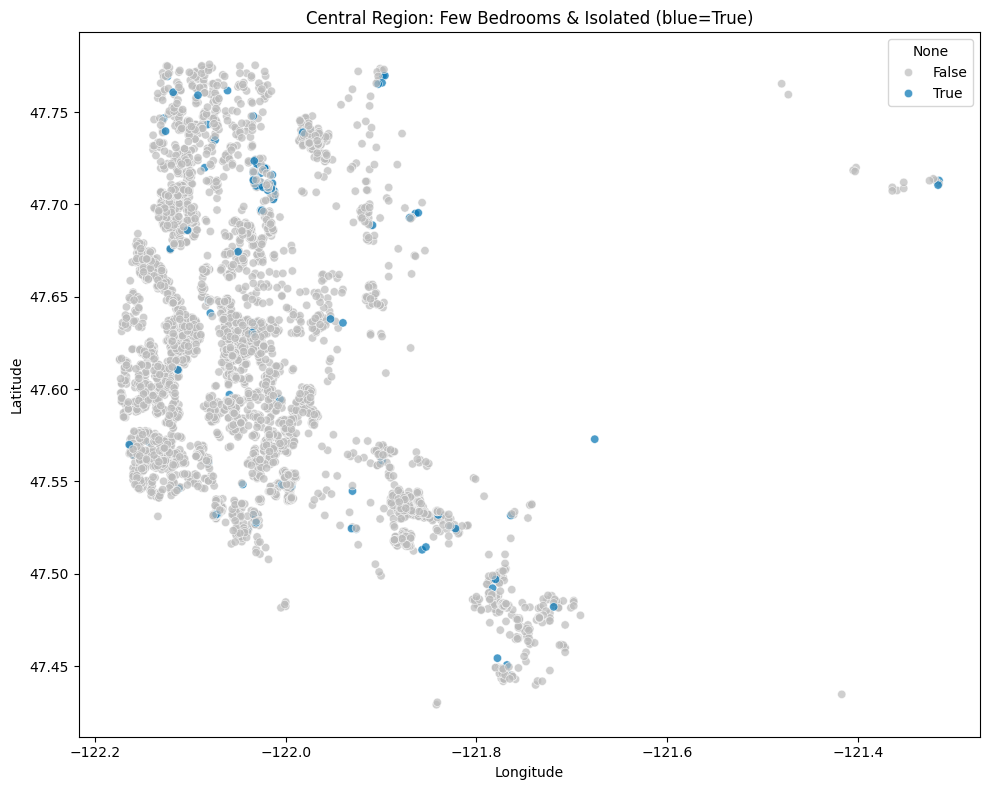

In [121]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=central, x='long', y='lat',
    hue=central['few_beds'] & central['is_isolated'],
    palette={True: '#0072B2', False: '#BBBBBB'},
    alpha=0.7
)
plt.title('Central Region: Few Bedrooms & Isolated (blue=True)')
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig("H2_Central_Isolated_Map.png", dpi=300)  # Save
plt.show()


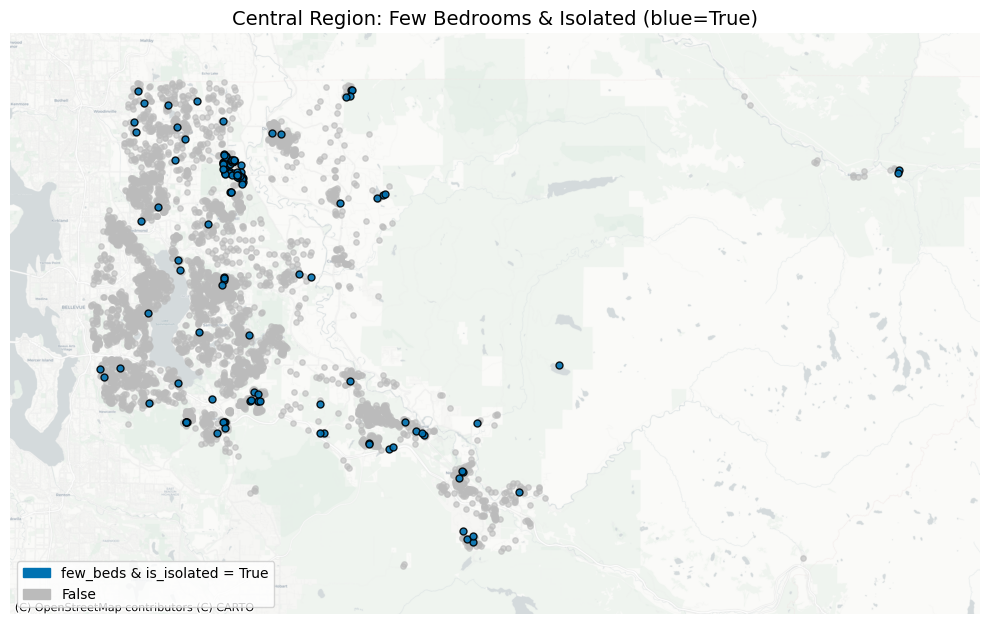

In [122]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

# Safety: make sure these exist (from your earlier steps)
# central = df_iqr[df_iqr['region'] == 'Central'].copy()
# central['few_beds'] = central['bedrooms'] < 3
# central['is_isolated'] = central['sqft_lot'] > central['sqft_lot15']

# 1) Build the boolean you’re visualizing
central = central.copy()
central['few_iso'] = central['few_beds'] & central['is_isolated']

# 2) Make a GeoDataFrame and project to Web Mercator (needed for contextily)
gdf = gpd.GeoDataFrame(
    central,
    geometry=gpd.points_from_xy(central['long'], central['lat']),
    crs="EPSG:4326"
).to_crs(epsg=3857)

# 3) Split by boolean to color True/False differently
gdf_true  = gdf[gdf['few_iso'] == True]
gdf_false = gdf[gdf['few_iso'] == False]

fig, ax = plt.subplots(figsize=(10, 8))

# Plot False (background, light gray)
if not gdf_false.empty:
    gdf_false.plot(ax=ax, markersize=15, color="#BBBBBB", alpha=0.6)

# Plot True (highlight, blue)
if not gdf_true.empty:
    gdf_true.plot(ax=ax, markersize=25, color="#0072B2", alpha=0.9, edgecolor="black")

# 4) Keep the map focused on your data (padding helps)
minx, miny, maxx, maxy = gdf.total_bounds
pad_x = (maxx - minx) * 0.10
pad_y = (maxy - miny) * 0.10
ax.set_xlim(minx - pad_x, maxx + pad_x)
ax.set_ylim(miny - pad_y, maxy + pad_y)

# 5) Add Seattle basemap (provider names vary by version—these two are reliable)
try:
    from xyzservices import providers as xyz
    ctx.add_basemap(ax, source=xyz.CartoDB.Positron, zoom=12)
except Exception:
    # Fallback raw tiles if provider naming differs
    positron_url = "https://cartodb-basemaps-a.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png"
    ctx.add_basemap(ax, source=positron_url, zoom=12)

# 6) Titles/legend
ax.set_title("Central Region: Few Bedrooms & Isolated (blue=True)", fontsize=14)
ax.set_axis_off()

# Manual legend
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color="#0072B2", label="few_beds & is_isolated = True"),
    mpatches.Patch(color="#BBBBBB", label="False"),
]
ax.legend(handles=legend_handles, loc="lower left")

plt.tight_layout()
plt.savefig("H2_Central_Isolated_Map_Seattle.png", dpi=300, bbox_inches="tight")
plt.show()


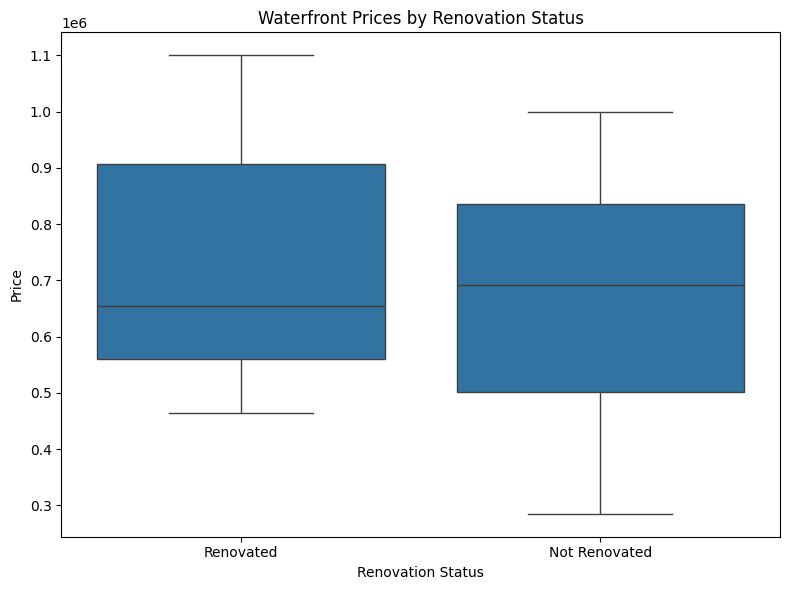

In [123]:
plt.figure(figsize=(8,6))
sns.boxplot(data=w, x='renovation_status', y='price')
plt.title('Waterfront Prices by Renovation Status')
plt.xlabel('Renovation Status')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig("H3_Renovation_Status_Boxplot.png", dpi=300)  # Save
plt.show()
